<h1> Imports <h1>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#defining dates
import datetime as dt
import time

#download stock data
import yfinance as yf

#file handling
import os
from os import listdir
from os.path import isfile, join

#additional plotting tools
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

#make plotly work in Jupyter notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

from plotly.subplots import make_subplots

import warnings
warnings.simplefilter("ignore")


<h1> Constants <h1>

In [92]:
PATH = "./stock_data/"

#Start end date constants
S_DATE = "2017-04-18"
E_DATE = "2022-04-18"
S_DATE_DT = pd.to_datetime(S_DATE)
E_DATE_DT = pd.to_datetime(E_DATE)

risk_free_rate = 0.0125 #Approximate 10 year bond rate

<h1> Get all Stocks Downloaded in List <h1>

In [93]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
#tickers

tickers.sort()
len(tickers)


3264

<h1> Get Dataframe from CSV <h1>

In [94]:
def get_stock_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col = 0)
    except FileNotFoundError:
        print("File Doesn't exist")
    else:
        return df


# Merge Multiple Stocks in One Dataframe by Column Name

In [95]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    #Hold data for all dataframes with same column name
    mult_df = pd.DataFrame()

    for x in tickers:
        df = get_stock_df_from_csv(x)

        if not df.index.is_unique:
            df = df.loc[~df.index.duplicated(), :]

        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]

    return mult_df        

# Markowitz Portfolio Optimization

<p> Markowitz proved that you could make an efficient portfolio. This method allows investors to construct diversified portolfios that maximize returns without unacceptable levels of risk. 

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight. <p>

# Plotting an Efficient Frontier

In [96]:
#example list
port_list = ['CALX', 'NOVT', 'RGEN', 'AMD', 'INTC', 'NFLX', 'C', 'SUP', 'WING', 'MSCI', 'CBRE']
num_stocks = len(port_list)
num_stocks

11

In [97]:
mult_df = merge_df_by_column_name('Close', S_DATE, E_DATE, *port_list)
mult_df

,CALX,NOVT,RGEN,AMD,INTC,NFLX,C,SUP,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-04-20,6.650000,27.400000,35.840000,13.110000,31.831732,141.179993,50.829594,22.251919,22.693409,93.881706,34.169998
2017-04-21,6.700000,27.299999,35.060001,13.000000,31.954905,142.869995,50.229149,21.795935,22.834766,93.216080,34.380001
2017-04-24,6.800000,27.850000,35.110001,13.130000,32.333225,143.830002,51.725929,22.343117,24.086760,93.815132,34.410000
2017-04-25,6.800000,28.049999,34.630001,13.490000,32.438797,152.160004,52.395996,22.571106,24.232155,94.566322,34.299999
2017-04-26,6.900000,27.950001,35.790001,13.410000,32.491592,150.169998,52.300274,19.470427,24.086760,94.727989,34.549999
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,37.660000,131.589996,163.149994,97.370003,46.570000,348.000000,50.549999,3.930000,107.199997,486.089996,86.629997
2022-04-12,39.020000,131.610001,156.789993,95.099998,46.500000,344.100006,50.340000,3.800000,107.370003,480.309998,85.930000
2022-04-13,40.139999,133.020004,160.160004,97.739998,47.009998,350.429993,50.150002,3.790000,108.730003,493.269989,86.400002


# Plot Price of Investments over Total Dataset

In [98]:
fig = px.line(mult_df, x = mult_df.index, y = mult_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height = 1000, width = 1400, showlegend = True)
fig.show()

# Cumulative Return for All Stocks

In [99]:
mult_cum_df = merge_df_by_column_name('cum_return', S_DATE, E_DATE, *port_list)
mult_cum_df

,CALX,NOVT,RGEN,AMD,INTC,NFLX,C,SUP,WING,MSCI,CBRE
Date,,,,,,,,,,,
2017-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-21,1.007519,0.996350,0.978237,0.991609,1.003869,1.011971,0.988187,0.979508,1.006229,0.992910,1.006146
2017-04-24,1.022556,1.016423,0.979632,1.001526,1.015755,1.018770,1.017634,1.004098,1.061399,0.999291,1.007024
2017-04-25,1.022556,1.023723,0.966239,1.028986,1.019071,1.077773,1.030817,1.014344,1.067806,1.007292,1.003805
2017-04-26,1.037594,1.020073,0.998605,1.022883,1.020730,1.063678,1.028934,0.875000,1.061399,1.009014,1.011121
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,5.663158,4.802555,4.552176,7.427155,1.463006,2.464939,0.994499,0.176614,4.723838,5.177686,2.535265
2022-04-12,5.867669,4.803285,4.374721,7.254005,1.460806,2.437314,0.990368,0.170772,4.731330,5.116119,2.514779
2022-04-13,6.036090,4.854745,4.468750,7.455378,1.476828,2.482151,0.986630,0.170322,4.791259,5.254165,2.528534


In [100]:
fig = px.line(mult_cum_df, x = mult_cum_df.index, y = mult_cum_df.columns)
fig.update_xaxes(title="Date", rangeslider_visible=True)
fig.update_yaxes(title="Price")
fig.update_layout(height = 1000, width = 1400, showlegend = True)
fig.show()

# Mean Returns

In [101]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 #number of trading days per year
mean_ret

CALX    0.353551
NOVT    0.308076
RGEN    0.290245
AMD     0.394689
INTC    0.076581
NFLX    0.174936
C       0.005755
SUP    -0.367408
WING    0.304553
MSCI    0.326296
CBRE    0.184199
dtype: float64

# Correlation

In [102]:
#want portfolio to be noncorrelated
# want correlation less than 0.5
returns.corr()

,CALX,NOVT,RGEN,AMD,INTC,NFLX,C,SUP,WING,MSCI,CBRE
CALX,1.000000,0.389910,0.244143,0.281034,0.269956,0.242924,0.304125,0.158762,0.269943,0.347442,0.329478
NOVT,0.389910,1.000000,0.386484,0.438955,0.481540,0.378993,0.447729,0.261189,0.338818,0.512657,0.416214
RGEN,0.244143,0.386484,1.000000,0.396329,0.308810,0.357710,0.162676,0.118859,0.293999,0.438676,0.186270
AMD,0.281034,0.438955,0.396329,1.000000,0.385415,0.413477,0.302712,0.190766,0.284879,0.455896,0.310680
INTC,0.269956,0.481540,0.308810,0.385415,1.000000,0.380405,0.462568,0.267410,0.268852,0.428079,0.399438
NFLX,0.242924,0.378993,0.357710,0.413477,0.380405,1.000000,0.234657,0.150817,0.268399,0.444097,0.206883
C,0.304125,0.447729,0.162676,0.302712,0.462568,0.234657,1.000000,0.403800,0.245782,0.444363,0.664427
SUP,0.158762,0.261189,0.118859,0.190766,0.267410,0.150817,0.403800,1.000000,0.154798,0.216192,0.308616
WING,0.269943,0.338818,0.293999,0.284879,0.268852,0.268399,0.245782,0.154798,1.000000,0.390896,0.236953
MSCI,0.347442,0.512657,0.438676,0.455896,0.428079,0.444097,0.444363,0.216192,0.390896,1.000000,0.453536


# Generate Random Weights Equal to 1

In [103]:
#generate random weights for the number of stocks we picked. check it equals 1
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.02474231 0.04362547 0.24164259 0.26601764 0.11896481 0.02633802
 0.01163899 0.17507025 0.00860214 0.02892045 0.05443733]
Total Weight : 1.0


# Calculating Return of Portfolio using a Random Weighting

In [104]:
#annualized rate of return
np.sum(weights * returns.mean()) * 252

0.16886405635427867

# Calculating Volatility

In [105]:
#how much does the securities go up and down compared to the mean rate of return
#risk of x percent, how much does the price move from the average, sizE of the standard deviaton from the mean 
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.3352140485361444

# Analyzing Returns and Risks of 10000 Combinations

In [106]:
#return list
p_ret = []
#volatility list
p_vol = []
p_SR = []
#stock weightings
p_wt = []

#generate 10000 random portfolios
for x in range(10000):
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)

    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)

    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.19941599, 0.15927531, 0.22760484, ..., 0.21468518, 0.18974998,
        0.193768  ]),
 array([0.27957852, 0.30280678, 0.27973484, ..., 0.25923329, 0.29363992,
        0.3106204 ]),
 array([0.66856347, 0.48471606, 0.76895978, ..., 0.77993525, 0.60363039,
        0.58356759]),
 array([[0.03406285, 0.14061532, 0.15764729, ..., 0.09345269, 0.03419704,
         0.14193329],
        [0.16471693, 0.0572232 , 0.11527719, ..., 0.0081273 , 0.06734075,
         0.01876004],
        [0.10920761, 0.16723423, 0.07656129, ..., 0.07491609, 0.13236712,
         0.11405025],
        ...,
        [0.0384716 , 0.05822715, 0.17042615, ..., 0.15775934, 0.00611235,
         0.17286422],
        [0.11625586, 0.09872516, 0.00486801, ..., 0.14583916, 0.07304754,
         0.0483993 ],
        [0.06633323, 0.20785537, 0.15341575, ..., 0.00504646, 0.08800783,
         0.10358499]]))

# Plotting the Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

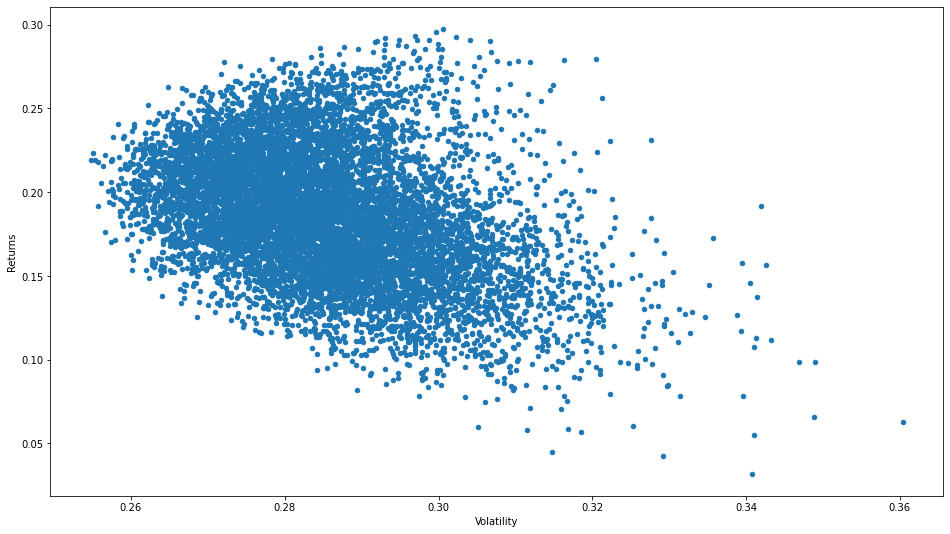

In [107]:
#plotting the 10000 portfolios

ports = pd.DataFrame({'Returns': p_ret, 'Volatility': p_vol})
ports.plot(x = 'Volatility', y = 'Returns', kind = 'scatter', figsize=(16,9))


# Sharpe Ratio

<p>Helps investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. 

A high ratio is good when compared to similar portfolios or funds with lower returns 

As return increases so does Sharpe Ratio, but as Standard Deviation increases the Sharpe Ratio decreases<p>



In [108]:
SR_idx = np.argmax(p_SR)

i = 0
#tells you how much of each security you should buy
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], 
    (p_wt[SR_idx][i] * 100)))
    i += 1

#shows volatility of portfolio
print("\nVolatility :", p_vol[SR_idx])
#shows return
print("Return : ", p_ret[SR_idx])



Stock : CALX : 5.85
Stock : NOVT : 16.21
Stock : RGEN : 14.91
Stock : AMD : 9.82
Stock : INTC : 5.68
Stock : NFLX : 5.45
Stock : C : 1.88
Stock : SUP : 0.09
Stock : WING : 12.01
Stock : MSCI : 16.37
Stock : CBRE : 11.73

Volatility : 0.27215088896794765
Return :  0.2778823743805469


<p> Calculate how many shares to purchase for each security 

Look at security closes to 1 (1%) and base the amount of other shares off that. <p>

In [119]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares



# Get Portfolio Weighting

In [120]:
def get_port_weighting(share_cost):

    #Holds weight for stocks
    stock_wts = []
    #All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)

    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

# Returns the Value of Portfolio by Date

In [121]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Close', date, 
                                    date, *port_list)

    #Convert from dataframe to Python List
    port_prices = port_prices.values.tolist()
    #Trick that converst a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

# Aproximate Portfolio Weighting Based on Request

In [122]:
port_list = ['CALX', 'NOVT', 'RGEN', 'AMD', 'INTC', 'NFLX', 'C', 'SUP', 'WING', 'MSCI', 'CBRE']

port_wts = [13, 8, 19, 6, 1, 7, 1, 1, 11, 16, 17]

# Get all stock prices on the starting date
port_df_start = merge_df_by_column_name('Close',  '2022-01-07', 
                                  '2022-01-07', *port_list)
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()

# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

tot_shares, share_cost = get_port_shares(3.63, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date(E_DATE, tot_shares, port_list)


Shares : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Share Cost : [59.7400016784668, 159.9199981689453, 206.7899932861328, 132.0, 53.03598785400391, 541.0599975585938, 65.26593780517578, 4.929999828338623, 158.00038146972656, 550.9439086914062, 104.77999877929688]
Total Investment : 2036.4662051200867
Stock Weights : [0.029335130398073086, 0.0785281866042629, 0.10154354281265315, 0.064818163772188, 0.026043146564701514, 0.2656857237297922, 0.032048623071222124, 0.0024208601232584216, 0.07758556516797664, 0.2705391856276437, 0.051451872128228215]


[38.790000915527344,
 127.38999938964844,
 152.4499969482422,
 93.88999938964844,
 46.63999938964844,
 337.8599853515625,
 52.310001373291016,
 3.559999942779541,
 103.66999816894533,
 478.010009765625,
 85.63999938964844]